   Hours_Studied  Attendance (%)  Assignments_Completed  Sleep_Hours  \
0       6.993428              85                      9     5.785549   
1       5.723471              93                     10     8.582469   
2       7.295377              65                      5     8.989921   
3       9.046060              96                      9     8.413467   
4       5.531693              92                      6     6.845961   

   Internet_Usage_Level  Passed_Exam  
0                     1            1  
1                     2            1  
2                     4            0  
3                     1            1  
4                     4            0  
Index(['Hours_Studied', 'Attendance (%)', 'Assignments_Completed',
       'Sleep_Hours', 'Internet_Usage_Level', 'Passed_Exam'],
      dtype='object')


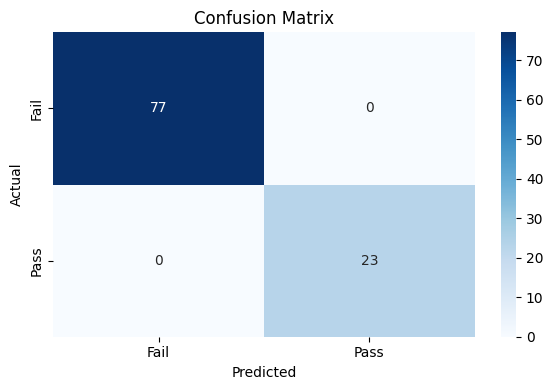

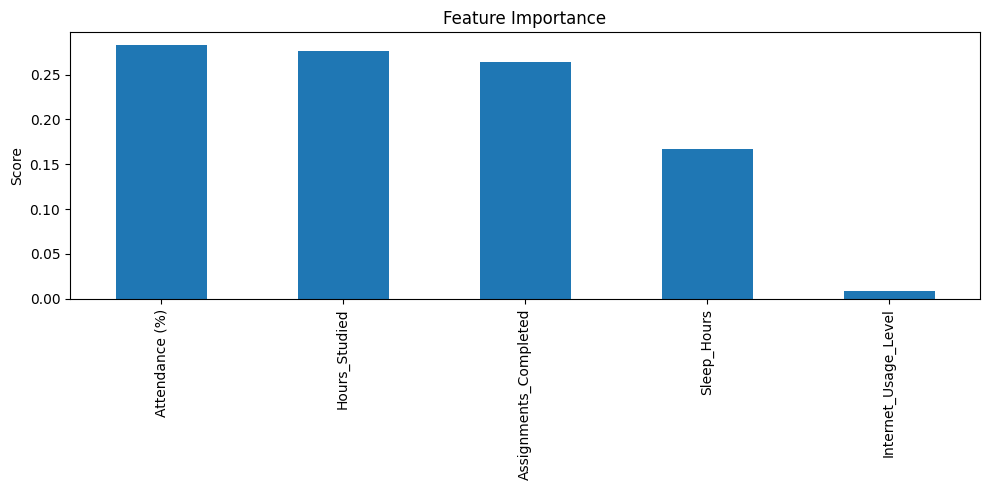

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
data_path = "/content/Student_Exam_Performance_Dataset.csv"
df = pd.read_csv(data_path)
print(df.head())
print(df.columns)

np.random.seed(42)
n = 500
hours_studied = np.random.normal(6, 2, n).clip(0, 12)
attendance = np.random.randint(60, 101, n)
assignments_completed = np.random.randint(5, 11, n)
sleep_hours = np.random.normal(6.5, 1.5, n).clip(3, 10)
internet_usage = np.random.randint(1, 5, n)

pass_fail = [
    1 if (hs > 5 and att > 75 and ac > 6 and sh > 5) else 0
    for hs, att, ac, sh in zip(hours_studied, attendance, assignments_completed, sleep_hours)
]

df = pd.DataFrame({
    'Hours_Studied': hours_studied,
    'Attendance (%)': attendance,
    'Assignments_Completed': assignments_completed,
    'Sleep_Hours': sleep_hours,
    'Internet_Usage_Level': internet_usage,
    'Passed_Exam': pass_fail
})

X = df.drop('Passed_Exam', axis=1)
y = df['Passed_Exam']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
importance.plot(kind='bar')
plt.title("Feature Importance")
plt.ylabel("Score")
plt.tight_layout()
plt.show()
